# THE BASICS

## Tensor Orders


1. $1^{st}$-Order Tensors - Vectors

    A $1^{st}$-Order Tensor is either a row or column vector. We often see it denoted as having shape of either $\mathbb{R}^{Mx1}$ or $\mathbb{R}^{1xN}$. Here, M dictates the number of rows (elements) in the column vector. N dictates the number of columns (elements) in the row vector. $\mathbb{R}$ represents the overall state of the $1^{st}$-Order tensor. It means that the tensor is constructed of all real values and is in the shape of {M x 1} or {1 x N}.
    
    $$
        A = 
        \begin{bmatrix}
        1 & 2 & 3
        \end{bmatrix}
    $$

    Where **A** is a 1 x 3 Vector

    $$
        B = 
        \begin{bmatrix}
        4 \\ 5 \\ 6
        \end{bmatrix}
    $$

    Where **B** is a 3 x 1 matrix.


2. $2^{nd}$-Order Tensors - Matrices

    A $2^{nd}$-Order Tensor is a matrix. Throughout the tutorial, we will only deal with real numbers. Therefore if **A** is a $2^{nd}$-Order Tensor having **M** rows and **N** columns, then A $\in \mathbb{R}^{MxN}$.

    $$
      A = 
      \begin{bmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
      \end{bmatrix}
    $$

    $ A \in \mathbb{R}^{3x3} $

3. $3^{rd}$-Order Tensors - Cubes

    A $3^{rd}$-Order Tensors can be thought of as a cube or stacked matrices. Therefore if **A** is a $3^{rd}$-Order Tensor having K instances of matrices of shape I rows and J columns, it would be denoted as **A** $\in \mathbb{R}^{IxJxK}$

    $$
        A = 
        \begin{bmatrix}
            \begin{bmatrix}
                1 & 2 & 3 \\
                4 & 5 & 6 \\
                7 & 8 & 9 \\
                10 & 11 & 12
            \end{bmatrix}
            \begin{bmatrix}
                11 & 12 & 13 \\
                14 & 15 & 16 \\
                17 & 18 & 19 \\
                20 & 21 & 22
            \end{bmatrix}
            \begin{bmatrix}
                31 & 32 & 33 \\
                34 & 35 & 36 \\
                37 & 38 & 39 \\
                40 & 41 & 42
            \end{bmatrix}
        \end{bmatrix}
    $$

    
       $$ A \in \mathbb{R}^{4x3x3}$$
    

## Factorization


To understand the premise of this paper (this method) we first need to get an understanding and intrinsic level of intuition for factorization. 

### Example 1
Let's start with simple number factorization. If I give the number 24 and ask for the lowest factors possible, we can see that those factors are 3 and 2. This means that as long as I have both 3 and 2, I can reproduce 24. These are the most important building blocks of 24.

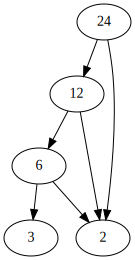

In [1]:

from graphviz import Digraph
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('a', '24')
dot.node('b', '12')
dot.node('c', '2')
dot.node('d','6')
dot.node('e','3')

# Add edges
dot.edges(['ab', 'ac', 'bd', 'bc', 'de', 'dc'])

# Visualize the graph
dot

### Example 2

If **X** is defined as the set of numbers in:

$$
\{1,3,6,9,18,27,36,54,81,162\}
$$

We can actually store all the information we need about this set in the form of:

$$
\{1,3,6,9\}
$$

And this is becuase as long as we have these 4 numbers, we can create every value in **X**.


### Example 3


For a more relevant example. If the matrix **A** $\in \mathbb{R}^{4x4}$ is defined as:
$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

We can actually find two vectors that encompass all the information in *A* but in a reduced form. Without formal proof, the two vectors:

$$
v1 = 
\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}

, 

v2 = 
\begin{bmatrix}
1 \\ 6 \\ 3 \\ 9
\end{bmatrix}
$$

Will reproduce **A** when the outer product is taken between v1 and v2:

$$
v1 \otimes v2 = 

\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 6 & 3 & 9
\end{bmatrix}
=
\begin{bmatrix}
2*1 & 2*6 & 2*3 & 2*9 \\
7*1 & 7*6 & 7*3 & 7*9 \\
4*1 & 4*6 & 4*3 & 4*9 \\
1*1 & 1*6 & 1*3 & 1*9
\end{bmatrix}
=
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$


### A Note on Rank

You'll notice that v1 and v2 are both 1-D vectors that when the outer product is taken, creates a 4x4 matrix **A**. Since both of these vectors a matrices of 1 column (or row), it is said that the resultant matrix **A** is a ***RANK 1*** matrix. Now, depending on what source or post you read, you'll get conflicting information on what the rank of a tensor or matrix is. For example, if we read the definition for rank of a tensor on Tensorflow's site, it says the rank is simply the number of dimensions of the tensor:

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/tf_rank.png'>



Yet this is inaccurate in the context of this paper. Wikipedia actually gives a better definition of tensor rank

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/rank_wiki.png'>

> The rank of a tensor is the minimum number of simple tensors that sum to T

I bring this up because it is paramount we understand the meaning of rank in the context of this paper. This frist definition (from Tensorflow) you will actually see in a multitude of place including Wolfram. 



#### Problem with Rank as Dimensions

As seen in the previous example with matrix

$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

The basic definition would have you believe the rank of this matrix is 2 since there are two dimensions {rows} and {columns}. But we saw that **A** actually decomposes to **v1** and **v2**, each a column (or row) vector. Since A is a linear combination of single column vectors, it is rank is actually 1. 


To demonstrate a rank 2 matrix, if we had matrix **B**

$$
B = 
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Without formal proof, **B** could decompose to **v1** and **v2** of:

$$
B =
\begin{bmatrix}
1 & 6 \\
2 & 8 \\
3 & 9 \\
4 & 5
\end{bmatrix}_{v1}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1 \\
1 & 4 & 7 & 5
\end{bmatrix}_{v2}
=
 \sum_{r=1}^R v_1 \otimes v_2 = 
\begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1
\end{bmatrix}
+
\begin{bmatrix}
6 \\
8 \\
9 \\
5
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 4 & 7 & 5
\end{bmatrix}
=
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Because **B** is a linear combination of **v1** and **v2**, each matrices consisting of 2 column-vectors, the rank of **B** is two. In this instance, it just happens to be a rank value that matches the number of dimensions of **B**. But the existence of 2 dimensions is not what gives this matrix a rank of 2

## Decomposition of Matrices

So how do we get to this v1 and v2 if we are only given the final matrix **B**. Well, there's multiple ways to go about it. Too many to actually cover here, but I want to at least cover the basics and give an idea. Let's switch up some notation. Instead of v1 and v2, let's denote the decomposed matrices as H and W. H (v1) is for the decomposed matrix with the column vectors and W (v2) is the matrix with row vectors as seen above. We essentially are trying some H and W such that their outer product either equals *B* or gets very close. More concretely

$$
B = HW
$$

If we can find the perfect H and W, then we have it such that 

$$ B - HW = 0$$

Finding the perfect H and W is a challenge, so we want to find some that keeps the error as low as possible. In other words, we want to find H and W that minimizes the error between B and the outer product of H and W

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}
$$

This optimization isn't very nice. Something we can do to make our lives easier is to minimize the squared error. If that doesn't ring some bells, it should. Because this has turned into solving a *Least Squares* problem

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2
$$

By minimizing the squared error, we have turned the objective function into a convex curve. From calculus, we know the minimum of a convex curve is where the derivative equals 0

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2 => \frac{d}{dHW} \begin{bmatrix}B - HW \end{bmatrix}^2 = 0
$$

That derivative shouldn't look right to you. We want to take the derivative of the objective function, but there are two unknowns, H and W. We have two unknowns and one equation. We are faced with an underdetermined system. A ubiqutious way to solve this least squares problem is by employing a method called alternating least squares. Since we have two unknowns, we first fix one of the unkonwns and model it as a constant. We then take the derivative of the objective function with respect to the non fixed variable, set it euqal to 0 and solve. We then hold that variable fixed and take the derivative of the fucntion with respect to the previously held fixed variable. We alternate back and forth until we converge to a solution. Hence **Alternating Least Squares** or **ALS**

### Partial Derivatives

$$
\frac{\partial}{\partial H} \begin{bmatrix} B - HW \end{bmatrix}^2 \\
= 2\begin{bmatrix} B - HW \end{bmatrix} * W \\
= 2BW - 2HW^TW
$$

Setting it equal to 0 and solving for H yields

$$
0 = 2BW - 2HW^TW \\
HW^TW = BW \\
\boxed{H = (W^TW)^{-1}BW}
$$

We can do the same thing when solving for W after taking the partial with respect to W. It's the same as above with just the variables switched

$$
\boxed{W = (H^TH)^{-1}BH}
$$


#### ALS Algorithm
* **inputs:** B, rank, iterations
* **output:** H, W

$$
i,j = shape(B) \\
\text{initialize  } W \in \text{random(}\mathbb{R}^{\text{rank x i}}) \\
\text{for iter } = 1,2, \text{... iterations: do }\\
H := (WW^T)^{-1}WB \\
W := (H^TH)^{-1}HW^T
$$

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def als(B, rank, iters, negative=False):
    #intialize U
    #shape should be rank x M[rows]
    W = np.random.random((rank, B.shape[0]))

    W = -1 * W if negative else W
    
    #iterate
    for _ in range(iters):
        
        #hold U constant and update V
        H = np.linalg.pinv(W@W.T) @ (W @ B)
        
 
        #hold V constant and update U
        W = np.linalg.pinv(H @ H.T) @ (H @ B.T)

    return H,W

In [2]:
v1 = np.array([[1,2,3,4],[6,8,9,5]])
v2 = np.array([[4,6,2,1], [1,4,7,5]])
B = v1.T @ v2

B

array([[10, 30, 44, 31],
       [16, 44, 60, 42],
       [21, 54, 69, 48],
       [21, 44, 43, 29]])

In [3]:
h,w = als(B, 2, 10, True)

In [4]:
h

array([[-22.58139847, -58.28581405, -74.76636173, -52.03141067],
       [ -0.43280503,  -1.85587367,  -3.35373442,  -2.40086688]])

So we can see that the ALS method works. However there is one caveat, matrix decomposition does not guarantee uniqueness. We can see this in that there's nothing stopping **w** and **h** from being negative. If both are negative, we will still arrive at the original **B** matrix. This is problematic for 2 reasons:

1. Hard to have confidence in an anlysis where there is potentially no statistical repeatability
2. How do you interpret a negative value?

To combat 2. - we can force constraints on our optimization for all positive values. Hence NMF or non-negative matrix factorization. There's multiple optimizaiton techniques that force $H\geq0$ and $W\geq0$:


1. Multiplicative update rule
2. alternating non-negative least squares
3. hierarchical alternating least squares
4. orthogonal NMF


In [5]:
def _initialize(m,n,rank):

    H = np.random.random((m,rank))
    W = np.random.random((n,rank))

    return H,W

def MUR(M, d, iters, tol=1e-3):
    '''
    Based off of Lee and Seung's 
    "Algorithms for Non-negative Matrix Factorization"
    Paper

    https://papers.nips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf


    Alternative

    "Fast Local Algorithms for Large Scale Nonnegative Matrix and
    Tensor Factorizations"

    https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.214.6398&rep=rep1&type=pdf
    '''

    m,n=M.shape
    
    H,W = _initialize(m,n,d)

    H_old = H.copy()
    W_old = W.copy()

    errors = []

    for _ in range(iters):
        W = _update_W(M, W, H)
        H = _update_H(M, W, H)

        H_tol = np.linalg.norm(H - H_old)
        W_tol = np.linalg.norm(W - W_old)

        err = reconstruction_error(M, H, W)
        errors.append(err)

        if  err <= tol:
            return H,W, errors

        if H_tol <= tol and W_tol <= tol:
            return H,W, errors

        

        H_old = H.copy()
        W_old = W.copy()
        
    
    return H,W, errors



def _update_W(M, W, H):
    
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MH = M.T@H # => (2x3)
    HH = H.T@H # => (3x3)
    WHH = W@HH # => (2x3)

    MH_WHH = MH / WHH

    W_MH_WHH = W * MH_WHH

    return W_MH_WHH


def _update_H(M, W, H):
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MW = M@W # => (4x3)
    WW = W.T@W # => (3x3)
    HWW = H@WW # => (4x3)

    MW_HWW = MW / HWW # => (4x3)

    H_MW_HWW = H * MW_HWW # => (4x3)

    return H_MW_HWW


def reconstruction_error(M, H, W):
    reconstruction = H@W.T

    error = M -reconstruction

    error = np.linalg.norm(error, ord=2)

    return error

In [6]:
test = np.random.randint(0,100, size=(4,3))

In [7]:
h,w, e = MUR(test, 3, 100)

In [8]:
print(f'{h@w.T}\n\n{test}')

[[71.00009506 38.99992349 58.99993618]
 [55.00006165 70.99979963 55.00019701]
 [47.99773244 46.00210567 93.00012871]
 [11.0118902  23.99625862 67.99939476]]

[[71 39 59]
 [55 71 55]
 [48 46 93]
 [11 24 68]]


In [9]:
def direct_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    H_s = []
    W_s = []
    errs = []
    m,n,o = T.shape

    for i in range(o):

        sliced = T[:,:,i]

        H,W, errors = MUR(M=sliced, d=rank, iters=iters, tol=tol)
        errs.append(errors)

        
            

        H_s.append(H)
        W_s.append(W)
    if plot_errors:
            
            plt.figure()
            for pos, e in enumerate(errs):
                plt.plot(range(len(e)), e, label=f'Slice{pos}')
            plt.xlabel('Iterations')
            plt.ylabel('Reconstruction Error')
            plt.title('Direct NMF Errors')
            plt.legend()
    return H_s, W_s


In [10]:
def fixed_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    W_s = []
    errors_dict = defaultdict(list)

    m,n,o = T.shape

    H,W1 = _initialize(m=m, n=n, rank=rank)
    _,W2 = _initialize(m=m, n=n, rank=rank)
    _,W3 = _initialize(m=m, n=n, rank=rank)

    
    H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()


    for i in range(iters):
       
        W1 = _update_W(T[:,:,0], W1, H)
        H = _update_H(T[:,:,0], W1, H)

        W2 = _update_W(T[:,:,1], W2, H)
        H = _update_H(T[:,:,1], W2, H)

        W3 = _update_W(T[:,:,2], W3, H)
        H = _update_H(T[:,:,2], W3, H)

        H_tol = np.linalg.norm(H - H_old)
        W1_tol = np.linalg.norm(W1 - W1_old)
        W2_tol = np.linalg.norm(W2 - W2_old)
        W3_tol = np.linalg.norm(W3 - W3_old)

        err1 = reconstruction_error(T[:,:,0], H, W1)
        err2 = reconstruction_error(T[:,:,1], H, W2)
        err3 = reconstruction_error(T[:,:,2], H, W3)

        errors_dict['slice1'].append(err1)
        errors_dict['slice2'].append(err2)
        errors_dict['slice3'].append(err3)

        if  err1 <= tol and err2 <= tol and err3 <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H, W_s, errors_dict

        if H_tol <= tol and W1_tol <= tol and W2_tol <= tol and W3_tol <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H,W_s, errors_dict

        

        H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()

    if plot_errors:

            plt.figure()
            for k,v in errors_dict.items():
                
                plt.title('Fixed NMF Errors')
                plt.plot(range(len(v)), v, label=k)
                plt.xlabel('iterations')
                plt.ylabel('errors')
            plt.legend()
            plt.show()

    W_s.append(W1)
    W_s.append(W2)
    W_s.append(W3)
    return H, W_s, errors_dict









In [11]:
tensor_test = np.random.randint(0,100,size=(5,3,3))

In [12]:
h,wf,e = fixed_NMF(T=tensor_test, rank=7, iters=200, plot_errors=True)

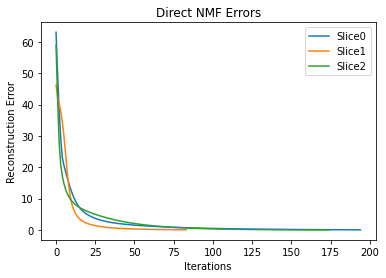

In [13]:
hs,ws = direct_NMF(tensor_test, rank=7, iters=200, tol=1e-3, plot_errors=True)

In [14]:
def reconstruction(H, W, fixed=False):

    if fixed:
        return np.dstack([H@W[0].T, H@W[1].T, H@W[2].T])

    else:
        return np.dstack([H[0]@W[0].T, H[1]@W[1].T, H[2]@W[2].T])


In [23]:
display(reconstruction(hs,ws, fixed=False), reconstruction(h, wf, fixed=True))


array([[[16.01534099, 19.00015158, 37.00014108],
        [38.00031769, 34.9995821 , 24.99989587],
        [77.99669511, 37.00031746, 92.99997186]],

       [[36.99905029, 41.99615128,  5.00017336],
        [91.00033244, 48.99771938, 56.99995421],
        [59.00008281, 76.00359687, 50.00003486]],

       [[52.99910052, 40.0016309 , 33.00085384],
        [85.99870258, 55.00187946, 62.00017347],
        [95.00167625, 52.9968184 , 30.99874405]],

       [[55.00445209, 73.00204931, 93.00090662],
        [17.98897877, 26.00276423, 13.00034599],
        [62.99925978, 80.99726553, 97.99909371]],

       [[40.98942923, 44.99735887, 24.9931584 ],
        [ 5.06614869,  4.99291349, 10.99983879],
        [97.00101145,  2.07428964,  6.02865613]]])

array([[[15.99699635, 19.00144032, 36.99957728],
        [37.99384228, 34.99962558, 25.00003765],
        [77.99816596, 36.99976855, 93.00015806]],

       [[36.99895621, 42.00210889,  5.00381572],
        [91.01061604, 49.00089384, 56.99996236],
        [58.99902028, 76.00169582, 49.99966104]],

       [[53.00302528, 39.99639706, 32.99901986],
        [85.97657295, 54.99870362, 61.99989861],
        [95.00311869, 53.00108723, 31.001246  ]],

       [[54.99872319, 72.99984108, 92.99981673],
        [18.0052099 , 25.99964389, 13.00189015],
        [63.00034713, 80.99938428, 97.99992314]],

       [[41.00206526, 45.0046366 , 25.00285013],
        [ 5.25100479,  4.98407996, 10.99704996],
        [97.00030369,  1.99850901,  5.99352142]]])

In [19]:
tensor_test

array([[[16, 19, 37],
        [38, 35, 25],
        [78, 37, 93]],

       [[37, 42,  5],
        [91, 49, 57],
        [59, 76, 50]],

       [[53, 40, 33],
        [86, 55, 62],
        [95, 53, 31]],

       [[55, 73, 93],
        [18, 26, 13],
        [63, 81, 98]],

       [[41, 45, 25],
        [ 5,  5, 11],
        [97,  2,  6]]])

In [3]:
def initialize(tensor, rank, norm=True):

    tensor_shape = tensor.shape

    factors = [np.random.randint(0, 100, size=(s,rank)) for s in tensor_shape]

    if norm:

        factors = [f / np.linalg.norm(f, axis=0, ord=2) for f in factors]

    return factors


def nncp(tensor, rank,  norm, iters=100):

    #initialize a matrix for each mode of the tensor
    #shape should be (dimension x rank) for each dimension of the tensor

    factors = initialize(tensor=tensor, rank=rank, norm=norm)

In [10]:
tensor = np.random.randint(0,10,size=(5,5,3))
factors = initialize(tensor, 2)
n_modes = len(factors)

In [23]:
for mode in range(n_modes):

    #isolate the current mode and only focus on the other modes

    isolated = [i for i in range(n_modes) if i != mode]


    #multiply the covariances of all non isolated modes 
    for pos, factor_dim in enumerate(isolated):
        if pos:

            accum *= factors[factor_dim].T@factors[factor_dim]
        
        else:

            accum = factors[factor_dim].T@factors[factor_dim]

    print(accum)

[[1.         0.76543654]
 [0.76543654 1.        ]]
[[1.         0.65371365]
 [0.65371365 1.        ]]
[[1.         0.56046353]
 [0.56046353 1.        ]]


In [11]:
factors[1].T@factors[1]

array([[1.        , 0.81009229],
       [0.81009229, 1.        ]])

In [16]:
f1 = factors[1].T.dot(factors[1])

In [19]:
f2 = factors[2].T@factors[2]

In [20]:
f1*f2

array([[1.        , 0.76543654],
       [0.76543654, 1.        ]])

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [25]:
def f_unfold(tensor, mode=0):
    """Simple unfolding function
        Moves the `mode` axis to the beginning and reshapes in Fortran order
    """
    return np.reshape(np.moveaxis(tensor, mode), (tensor.shape[mode], -1), order='F')

In [26]:
f_unfold(tensor)

TypeError: _moveaxis_dispatcher() missing 1 required positional argument: 'destination'

http://tensorly.org/stable/_modules/tensorly/random/base.html#random_cp
http://tensorly.org/stable/_modules/tensorly/decomposition/_nn_cp.html#non_negative_parafac
